## Implementação do modelo Graph Convolutions para o dataset SIDER

In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

siderDataset=pd.read_csv('sider.csv')

In [3]:
siderDataset.columns

Index(['smiles', 'Hepatobiliary disorders',
       'Metabolism and nutrition disorders', 'Product issues', 'Eye disorders',
       'Investigations', 'Musculoskeletal and connective tissue disorders',
       'Gastrointestinal disorders', 'Social circumstances',
       'Immune system disorders', 'Reproductive system and breast disorders',
       'Neoplasms benign, malignant and unspecified (incl cysts and polyps)',
       'General disorders and administration site conditions',
       'Endocrine disorders', 'Surgical and medical procedures',
       'Vascular disorders', 'Blood and lymphatic system disorders',
       'Skin and subcutaneous tissue disorders',
       'Congenital, familial and genetic disorders',
       'Infections and infestations',
       'Respiratory, thoracic and mediastinal disorders',
       'Psychiatric disorders', 'Renal and urinary disorders',
       'Pregnancy, puerperium and perinatal conditions',
       'Ear and labyrinth disorders', 'Cardiac disorders',
       'N

In [4]:
new_data = siderDataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].sum()
new_data

Hepatobiliary disorders                                                 743
Metabolism and nutrition disorders                                      996
Product issues                                                           22
Eye disorders                                                           876
Investigations                                                         1151
Musculoskeletal and connective tissue disorders                         997
Gastrointestinal disorders                                             1298
Social circumstances                                                    251
Immune system disorders                                                1024
Reproductive system and breast disorders                                727
Neoplasms benign, malignant and unspecified (incl cysts and polyps)     376
General disorders and administration site conditions                   1292
Endocrine disorders                                                     323
Surgical and

In [5]:
import numpy as np
import tensorflow as tf
import deepchem as dc
from deepchem.models.tensorgraph.models.graph_models import GraphConvModel


/home/mamonteiro/anaconda3/envs/lei/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Load SIDER Dataset

All MoleculeNet datasets are split into training, validation and test subsets following a 80/10/10 ratio. 

Different  splittings are recommended depending on each dataset's contents.

In [6]:
sider_tasks, sider_datasets, transformers = dc.molnet.load_sider(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = sider_datasets

Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.


In [7]:
len(sider_tasks)

27

In [8]:
sider_tasks

['Hepatobiliary disorders',
 'Metabolism and nutrition disorders',
 'Product issues',
 'Eye disorders',
 'Investigations',
 'Musculoskeletal and connective tissue disorders',
 'Gastrointestinal disorders',
 'Social circumstances',
 'Immune system disorders',
 'Reproductive system and breast disorders',
 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)',
 'General disorders and administration site conditions',
 'Endocrine disorders',
 'Surgical and medical procedures',
 'Vascular disorders',
 'Blood and lymphatic system disorders',
 'Skin and subcutaneous tissue disorders',
 'Congenital, familial and genetic disorders',
 'Infections and infestations',
 'Respiratory, thoracic and mediastinal disorders',
 'Psychiatric disorders',
 'Renal and urinary disorders',
 'Pregnancy, puerperium and perinatal conditions',
 'Ear and labyrinth disorders',
 'Cardiac disorders',
 'Nervous system disorders',
 'Injury, poisoning and procedural complications']

In [9]:
num_epochs = [10,20,30,40,50,60]
losses = []
loss =0

model = GraphConvModel(
    len(sider_tasks), batch_size=50, mode='classification')


# Treino do modelo

In [10]:
for i in num_epochs:
    # Set nb_epoch=10 for better results.
    loss = model.fit(train_dataset, nb_epoch=i)
    print("Epoch %d loss: %f" % (i, loss))
    losses.append(loss)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Epoch 10 loss: 766.190301
Epoch 20 loss: 607.935794
Epoch 30 loss: 367.081662
Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Epoch 40 loss: 208.842081
Epoch 50 loss: 131.543489
Epoch 60 loss: 84.684681


In [11]:
type(train_dataset)

deepchem.data.datasets.DiskDataset

In [12]:
import matplotlib.pyplot as plot

plot.figure(figsize=(10,7))
plot.ylabel("Loss")
plot.xlabel("Epoch")
x = num_epochs
y = losses
plot.scatter(x, y)
plot

<module 'matplotlib.pyplot' from '/home/mamonteiro/anaconda3/envs/lei/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [13]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores_1 = model.evaluate(train_dataset, [metric], transformers)
print("Training ROC-AUC Score: %f" % train_scores_1["mean-roc_auc_score"])


Evaluating model
computed_metrics: [0.9996950092421442, 0.9960245234217837, 1.0, 0.9986685035166009, 0.9927923338185347, 0.9975754760124564, 0.9959625041198938, 1.0, 0.9886994925037771, 0.9990434536551758, 0.9998980312181348, 0.9921413839698456, 0.999995790501688, 1.0, 0.9936508799101522, 0.9992117614936551, 0.9957622930565851, 1.0, 0.9942113311700422, 0.9927814837275116, 0.994058378906101, 0.9942043975843315, 1.0, 0.9992362509777836, 0.9981089814202835, 0.9949262360446571, 0.9962529354883272]
Training ROC-AUC Score: 0.996774


In [14]:
valid_scores_1 = model.evaluate(valid_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %f" % valid_scores_1["mean-roc_auc_score"])

computed_metrics: [0.6628757911392404, 0.6129184347006129, 0.4859154929577465, 0.630797680927629, 0.7272727272727273, 0.5827067669172932, 0.749031007751938, 0.6371186440677966, 0.4640957446808511, 0.6147186147186148, 0.6421734234234234, 0.4979338842975206, 0.6068802521008404, 0.5672764227642277, 0.6716814159292035, 0.6900493052442851, 0.47453248031496065, 0.6697892271662764, 0.5876744186046512, 0.6055045871559632, 0.6218604651162791, 0.6478506296135476, 0.6283396946564885, 0.5975112199102407, 0.6441057821604661, 0.7107188295165394, 0.5814151747655585]
Validation ROC-AUC Score: 0.615287


In [15]:
test_scores_1 = model.evaluate(test_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %f" % test_scores_1["mean-roc_auc_score"])

computed_metrics: [0.6904667721518988, 0.6253196930946292, 0.4964539007092199, 0.6425490196078432, 0.7271627344222625, 0.6006802721088436, 0.7224409448818898, 0.5028011204481793, 0.5981859410430839, 0.6680359937402192, 0.6487302761341223, 0.6572916666666666, 0.7535593220338983, 0.6685340802987862, 0.615040075436115, 0.6014931396287329, 0.6199813258636788, 0.5722455648926237, 0.6764184397163121, 0.6100895803866101, 0.5974815458098133, 0.6236230110159118, 0.5041666666666667, 0.5415657788539145, 0.5710691823899372, 0.7052083333333334, 0.5503690838037343]
Validation ROC-AUC Score: 0.621888


In [16]:
num_epochs = [60,70,80,90]
losses = []

model = GraphConvModel(
    len(sider_tasks), batch_size=50, mode='classification')
# Set nb_epoch=10 for better results.


In [17]:

for i in num_epochs:
    # Set nb_epoch=10 for better results.
    loss = model.fit(train_dataset, nb_epoch=i)
    print("Epoch %d loss: %f" % (i, loss))
    losses.append(loss)

Epoch 60 loss: 394.455559
Epoch 70 loss: 216.411856
Epoch 80 loss: 131.018563
Epoch 90 loss: 145.400471


<module 'matplotlib.pyplot' from '/home/mamonteiro/anaconda3/envs/lei/lib/python3.6/site-packages/matplotlib/pyplot.py'>

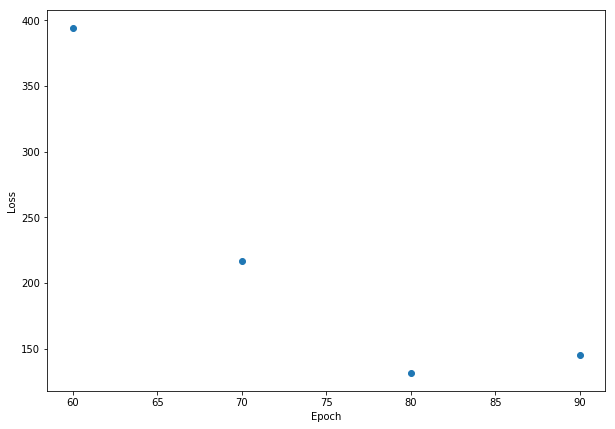

In [18]:
import matplotlib.pyplot as plot

plot.figure(figsize=(10,7))
plot.ylabel("Loss")
plot.xlabel("Epoch")
x = num_epochs
y = losses
plot.scatter(x, y)
plot

In [19]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores_2 = model.evaluate(train_dataset, [metric], transformers)
print("Training ROC-AUC Score: %f" % train_scores_2["mean-roc_auc_score"])



Evaluating model
computed_metrics: [0.999078866296981, 0.9940902090533281, 1.0, 0.9987904475014666, 0.9924769529354682, 0.9948279241283693, 0.995119137633533, 1.0, 0.9914887847208771, 0.9994432961787357, 1.0, 0.9925236469667875, 0.9997684775928405, 1.0, 0.9959287739224157, 0.9986234267734554, 0.9943167778601434, 1.0, 0.994218790794823, 0.992834040832828, 0.9981847165335713, 0.9945113609822829, 1.0, 0.999842938709141, 0.9986487478886685, 0.9946570972886762, 0.9969229175300456]
Training ROC-AUC Score: 0.996900


In [20]:
valid_scores_2 = model.evaluate(valid_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %f" % valid_scores_2["mean-roc_auc_score"])

computed_metrics: [0.7112341772151898, 0.5789721829325789, 0.579225352112676, 0.5645741703318673, 0.6611570247933884, 0.6208020050125314, 0.545404208194906, 0.590677966101695, 0.5478723404255319, 0.6471861471861473, 0.6004363738738738, 0.6088154269972452, 0.5854341736694677, 0.6182926829268293, 0.5705014749262537, 0.7129090094128194, 0.4906496062992126, 0.6098750975800156, 0.6367441860465116, 0.5493793847814354, 0.6127906976744186, 0.5976986539296569, 0.6550572519083969, 0.5748674010607915, 0.6535186015239802, 0.6539440203562341, 0.5449701619778347]
Validation ROC-AUC Score: 0.604555


In [21]:
test_scores_2 = model.evaluate(test_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %f" % test_scores_2["mean-roc_auc_score"])

computed_metrics: [0.6926424050632911, 0.644341432225064, 0.5106382978723405, 0.6472549019607843, 0.6950998185117967, 0.517687074829932, 0.6466535433070866, 0.569094304388422, 0.5941043083900226, 0.6355633802816901, 0.6192677514792899, 0.6588541666666667, 0.6291525423728814, 0.597922502334267, 0.557991513437058, 0.5881255044390638, 0.6358543417366946, 0.5430672268907563, 0.65802304964539, 0.5978312116925979, 0.6252713851498046, 0.63484292125663, 0.580787037037037, 0.6008878127522195, 0.580083857442348, 0.6625, 0.6059487624837169]
Validation ROC-AUC Score: 0.612203


In [22]:
type(test_scores_2)
test_scores_2['mean-roc_auc_score']

0.6122033723572907

[(0, 0.6529819125331805)]

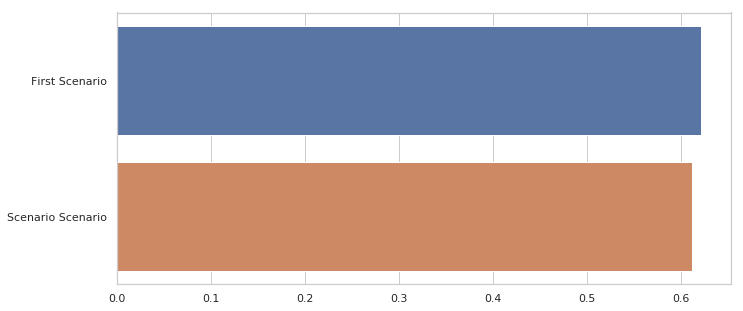

In [23]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11,5)})


sns.set(style="whitegrid")
ax = sns.barplot(x=[test_scores_1['mean-roc_auc_score'],test_scores_2['mean-roc_auc_score']],
                 y=['First Scenario','Scenario Scenario'])
ax.set(xlim=(0, None))

In [24]:
params_dict = {'batch_size' : [32,64,128,256],
               'nb_epoch': [40,100,200],
               'learning_rate': [0.0005,0.5,0.75,1],
               'n_filters': [32,64,128],
               'n_fully_connected_nodes' : [32,64,128]
              }

In [25]:
params_dict = {'batch_size' : [32],
               'nb_epoch': [50,60],
               'learning_rate': [0.0005],
               'n_filters': [32,64],
               'n_fully_connected_nodes' : [64]
              }

In [26]:
len(train_dataset)

1141

In [27]:
n_features = len(train_dataset)

def model_builder(model_params, model_dir):
    model = GraphConvModel(
            len(sider_tasks), mode='classification',**model_params)
    
    return model



In [28]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)
optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_hyperparams, all_results = optimizer.hyperparam_search(
   params_dict, train_dataset, valid_dataset, [], metric)

Fitting model 1/4
hyperparameters: {'batch_size': 32, 'nb_epoch': 50, 'learning_rate': 0.0005, 'n_filters': 32, 'n_fully_connected_nodes': 64}
computed_metrics: [0.6871044303797469, 0.5796793965110796, 0.8098591549295775, 0.5805677728908436, 0.7445529676934637, 0.5451127819548872, 0.6716500553709857, 0.6403389830508475, 0.5157358156028369, 0.637150728059819, 0.6168355855855856, 0.6019283746556474, 0.6015406162464986, 0.6548780487804877, 0.5716814159292035, 0.6972209771402959, 0.6599409448818898, 0.6358313817330211, 0.5618604651162791, 0.6055045871559632, 0.553953488372093, 0.6498046026921407, 0.6812977099236641, 0.5560995512035903, 0.6544150605109816, 0.7321882951653944, 0.5460358056265985]
Model 1/4, Metric mean-roc_auc_score, Validation set 0: 0.629362
	best_validation_score so far: 0.629362
Fitting model 2/4
hyperparameters: {'batch_size': 32, 'nb_epoch': 50, 'learning_rate': 0.0005, 'n_filters': 64, 'n_fully_connected_nodes': 64}
computed_metrics: [0.6799841772151899, 0.57496463932

In [29]:
best_dnn

GraphConvModel(dense_layer_size=128, dropout=[0.0, 0.0, 0.0],
               graph_conv_layers=[64, 64], mode='classification', n_classes=2,
               n_tasks=27, number_atom_features=75, uncertainty=False)

In [30]:
best_hyperparams

(32, 50, 0.0005, 64, 64)

In [31]:
all_results

{'(32, 50, 0.0005, 32, 64)': 0.6293618147097563,
 '(32, 50, 0.0005, 64, 64)': 0.6324000456133855,
 '(32, 60, 0.0005, 32, 64)': 0.6259124762420968,
 '(32, 60, 0.0005, 64, 64)': 0.6211153046598702}

In [32]:
model.fit(train_dataset,batch_size=32,nb_epoch=30,learning_rate=0.0005,n_filters=64,n_fully_connected_nodes=32)

52.54359321142413

In [33]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores_3 = model.evaluate(train_dataset, [metric], transformers)
print("Training ROC-AUC Score: %f" % train_scores_3["mean-roc_auc_score"])


Evaluating model
computed_metrics: [0.9999599507085644, 0.9980472635899401, 1.0, 0.9994924493602885, 0.9974065987384764, 0.9987115179407515, 0.9977364819015491, 1.0, 0.9982373222794716, 0.999960015747644, 1.0, 0.9971374724415049, 0.999995790501688, 1.0, 0.9991893776775445, 0.9999041111920116, 0.9962811959476155, 1.0, 0.998384991234941, 0.9974348089751365, 0.9996720286174099, 0.9987120883520737, 1.0, 0.9999846018342295, 0.9998421091282954, 0.997517942583732, 0.9994405304600082]
Training ROC-AUC Score: 0.999002


In [34]:
valid_scores_3 = model.evaluate(valid_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %f" % valid_scores_3["mean-roc_auc_score"])

computed_metrics: [0.7163765822784811, 0.5935879302215936, 0.4894366197183099, 0.5605757696921231, 0.652610818933133, 0.6390977443609023, 0.5387596899224807, 0.5953389830508475, 0.5206117021276595, 0.6259346713892169, 0.5932573198198199, 0.5599173553719008, 0.6022408963585435, 0.6164634146341463, 0.5885693215339234, 0.7017593007619901, 0.5118110236220472, 0.6131928181108509, 0.6351162790697675, 0.5334592552617377, 0.6076744186046512, 0.5866261398176292, 0.6296119592875318, 0.5750713994288046, 0.6349170775437024, 0.6455152671755724, 0.5485933503836318]
Validation ROC-AUC Score: 0.596894


In [35]:
test_scores_3 = model.evaluate(test_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %f" % test_scores_3["mean-roc_auc_score"])

computed_metrics: [0.707723496835443, 0.6458333333333333, 0.552304964539007, 0.6335294117647059, 0.6926799758015729, 0.5115646258503401, 0.6579724409448819, 0.5557889822595705, 0.5705215419501135, 0.6506259780907668, 0.6192677514792899, 0.6135416666666667, 0.631271186440678, 0.5641923436041083, 0.561056105610561, 0.594229217110573, 0.6302521008403361, 0.548202614379085, 0.6597960992907801, 0.6084394153701084, 0.6326530612244898, 0.6121991024071808, 0.5645833333333333, 0.6014931396287329, 0.569601677148847, 0.6470052083333333, 0.6089882761615284]
Validation ROC-AUC Score: 0.609086


[(0, 0.6529819125331805)]

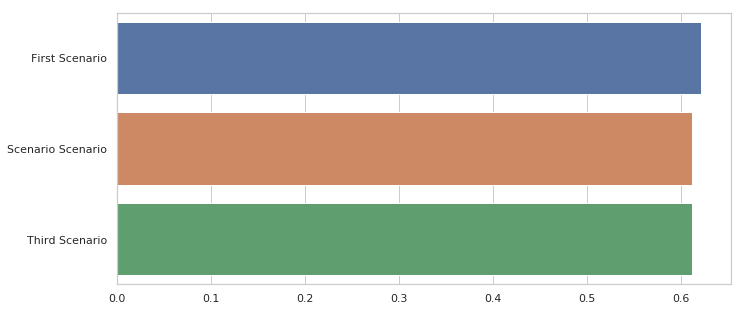

In [36]:
import seaborn as sns


sns.set(rc={'figure.figsize':(11,5)})

sns.set(style="whitegrid")
ax = sns.barplot(x=[test_scores_1['mean-roc_auc_score'],test_scores_2['mean-roc_auc_score'],test_scores_2['mean-roc_auc_score']],
                 y=['First Scenario','Scenario Scenario','Third Scenario'])
ax.set(xlim=(0, None))

# Implementação de uma rede de raiz Graph convolutional!

In [37]:
from deepchem.models.tensorgraph.tensor_graph import TensorGraph
from deepchem.models.tensorgraph.layers import Dense, BatchNorm,GraphConv
from deepchem.models.tensorgraph.layers import GraphPool, GraphGather,Dropout
import keras
import tensorflow as tf


Using TensorFlow backend.


In [38]:
tg = TensorGraph(use_queue=False)

In [39]:
from deepchem.models.tensorgraph.layers import Feature

atom_features = Feature(shape=(None, 75))
degree_slice = Feature(shape=(None, 2), dtype=tf.int32)
membership = Feature(shape=(None,), dtype=tf.int32)

deg_adjs = []
for i in range(0, 10 + 1):
    deg_adj = Feature(shape=(None, i + 1), dtype=tf.int32)
    deg_adjs.append(deg_adj)

# Definição da topologia da rede Graph convolutional!

In [40]:
batch_size = 50

gc1 = GraphConv(64,activation_fn=tf.nn.relu,in_layers=[atom_features, degree_slice, membership] + deg_adjs)
dropout_1 = Dropout(dropout_prob=0.5, in_layers=[gc1])
batch_norm1 = BatchNorm(in_layers=[dropout_1])
gp1 = GraphPool(in_layers=[batch_norm1, degree_slice, membership] + deg_adjs)

gc2 = GraphConv(64,activation_fn=tf.nn.relu,in_layers=[gp1, degree_slice, membership] + deg_adjs)
batch_norm2 = BatchNorm(in_layers=[gc2])
gp2 = GraphPool(in_layers=[batch_norm2, degree_slice, membership] + deg_adjs)

gc3 = GraphConv(64,activation_fn=tf.nn.relu,in_layers=[gp1, degree_slice, membership] + deg_adjs)
batch_norm3 = BatchNorm(in_layers=[gc3])
gp3 = GraphPool(in_layers=[batch_norm3, degree_slice, membership] + deg_adjs)

dense = Dense(out_channels=128, activation_fn=tf.nn.relu, in_layers=[gp3])
batch_norm4 = BatchNorm(in_layers=[dense])

readout = GraphGather(batch_size=batch_size,activation_fn=tf.nn.tanh,in_layers=[batch_norm4, degree_slice, membership] + deg_adjs)

In [41]:
from deepchem.models.tensorgraph.layers import Dense, SoftMax, \
    SoftMaxCrossEntropy, WeightedError, Stack

from deepchem.models.tensorgraph.layers import Label, Weights

costs = []
labels = []
for task in range(len(sider_tasks)):
    classification = Dense(out_channels=2, activation_fn=None, in_layers=[readout])

    softmax = SoftMax(in_layers=[classification])
    tg.add_output(softmax)

    label = Label(shape=(None, 2))
    labels.append(label)
    cost = SoftMaxCrossEntropy(in_layers=[label, classification])
    costs.append(cost)
    
all_cost = Stack(in_layers=costs, axis=1)
weights = Weights(shape=(None, len(sider_tasks)))
loss = WeightedError(in_layers=[all_cost, weights])
tg.set_loss(loss)

In [42]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

def data_generator(dataset, epochs=1, predict=False, pad_batches=True):
    for epoch in range(epochs):
        if not predict:
            print('Starting epoch %i' % epoch)
        for ind, (X_b, y_b, w_b, ids_b) in enumerate(
            dataset.iterbatches(batch_size, pad_batches=pad_batches, deterministic=True)):
            d = {}

            for index, label in enumerate(labels):
                d[label] = to_one_hot(y_b[:, index])
            d[weights] = w_b
            multiConvMol = ConvMol.agglomerate_mols(X_b)
            d[atom_features] = multiConvMol.get_atom_features()
            d[degree_slice] = multiConvMol.deg_slice
            d[membership] = multiConvMol.membership
            for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
                d[deg_adjs[i - 1]] = multiConvMol.get_deg_adjacency_lists()[i]
            yield d

In [43]:
tg.fit_generator(data_generator(train_dataset, epochs=60))

Starting epoch 0
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
St

654.6157569384637

In [44]:
# Training dataset

In [45]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

def reshape_y_pred(y_true, y_pred):
    """
    TensorGraph.Predict returns a list of arrays, one for each output
    We also have to remove the padding on the last batch
    Metrics taks results of shape (samples, n_task, prob_of_class)
    """
    n_samples = len(y_true)
    retval = np.stack(y_pred, axis=1)
    return retval[:n_samples]


In [46]:
print("Evaluating model")
train_predictions = tg.predict_on_generator(data_generator(train_dataset, predict=True))
train_predictions = reshape_y_pred(train_dataset.y, train_predictions)
train_scores_4 = metric.compute_metric(train_dataset.y, train_predictions, train_dataset.w)

print("----------------")
print("Training ROC-AUC Score: %f" % train_scores_4)


Evaluating model
computed_metrics: [0.7897073321010474, 0.7602739726027397, 0.9919786096256684, 0.7480373610003361, 0.7989252789907811, 0.7688680957324022, 0.8630014153046783, 0.8226995502803047, 0.7421144384612406, 0.8122739351886026, 0.8146560514550161, 0.7944225161795035, 0.8095833438570791, 0.8121879415920866, 0.743585214973417, 0.8085783102766799, 0.8474919693600198, 0.770470641418454, 0.7516728208571108, 0.7567798665858096, 0.796158158478823, 0.7857412165092924, 0.8730924802353375, 0.7429522595268452, 0.7713519864874789, 0.8557615629984051, 0.7400918635170604]
----------------
Training ROC-AUC Score: 0.798980


In [47]:
# Validation Dataset

In [48]:
valid_predictions = tg.predict_on_generator(data_generator(valid_dataset, predict=True))
valid_predictions = reshape_y_pred(valid_dataset.y, valid_predictions)
valid_scores_4 = metric.compute_metric(valid_dataset.y, valid_predictions, valid_dataset.w)
print("Valid ROC-AUC Score: %f" % valid_scores_4)


computed_metrics: [0.6540743670886076, 0.504007543611504, 0.5211267605633803, 0.5829668132746901, 0.6435011269722013, 0.5676691729323309, 0.6472868217054264, 0.5328813559322034, 0.5678191489361702, 0.6292798110979929, 0.5520833333333334, 0.5440771349862259, 0.6029411764705883, 0.5890243902439025, 0.4976401179941003, 0.6801882563872703, 0.6343503937007874, 0.5991412958626073, 0.589767441860465, 0.5817593092282785, 0.5467441860465116, 0.601823708206687, 0.705470737913486, 0.5528355773153815, 0.651277454056477, 0.7022900763358779, 0.5008525149190111]
Valid ROC-AUC Score: 0.591959


In [49]:
# Test Dataset

In [50]:
test_predictions = tg.predict_on_generator(data_generator(test_dataset, predict=True))
test_predictions = reshape_y_pred(test_dataset.y, test_predictions)
test_scores_4 = metric.compute_metric(test_dataset.y, test_predictions, test_dataset.w)
print("Test  ROC-AUC Score: %f" % test_scores_4)

computed_metrics: [0.7007515822784809, 0.5875426257459506, 0.0602836879432624, 0.5660784313725491, 0.6451905626134301, 0.6145124716553287, 0.7260088582677164, 0.6139122315592904, 0.6396825396825397, 0.6559076682316118, 0.5763683431952662, 0.5723958333333333, 0.6335593220338983, 0.4789915966386555, 0.6277699198491278, 0.5926150121065376, 0.7012138188608776, 0.5877684407096172, 0.5926418439716312, 0.6621876473361623, 0.5859748154580982, 0.6342309261525907, 0.41481481481481475, 0.5538740920096852, 0.5735849056603773, 0.6729166666666667, 0.6366695614415979]
Test  ROC-AUC Score: 0.589165



# Nossos Resultados Finais

[(0, 0.6529819125331805)]

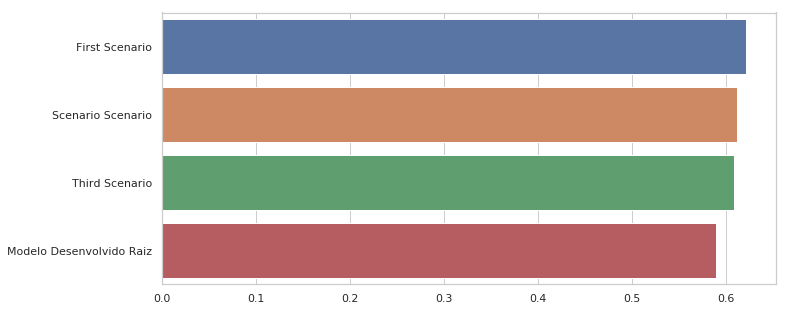

In [51]:
import seaborn as sns


sns.set(rc={'figure.figsize':(11,5)})

sns.set(style="whitegrid")
ax = sns.barplot(x=[test_scores_1['mean-roc_auc_score'],test_scores_2['mean-roc_auc_score'],test_scores_3['mean-roc_auc_score'],test_scores_4],
                 y=['First Scenario','Scenario Scenario','Third Scenario','Modelo Desenvolvido Raiz'])
ax.set(xlim=(0, None))

In [52]:
print(test_scores_1['mean-roc_auc_score'])

print(test_scores_2['mean-roc_auc_score'])
print(test_scores_3['mean-roc_auc_score'])
print(test_scores_4)

0.6218875357458862
0.6122033723572907
0.609085816681458
0.5891647488736703
